# Nombre de feuilles 

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
import cv2 as cv

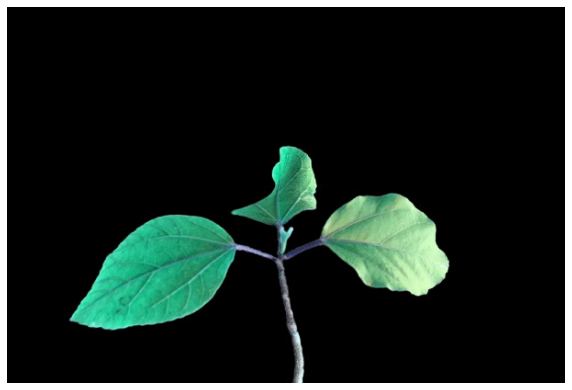

In [15]:
#img = cv2.imread("images/test7-removebg-preview.jpg") #instant t 
img = cv2.imread("images/test28-removebg-preview.jpg")# instant t+1
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

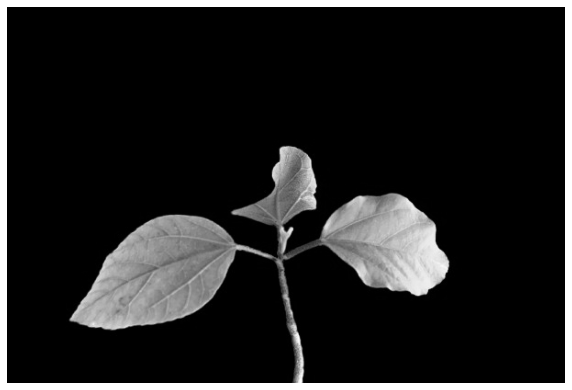

In [16]:
cells = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cells,cmap="gray")
plt.show()

In [17]:
cells = cv2.GaussianBlur(cells, (7, 7), 0)

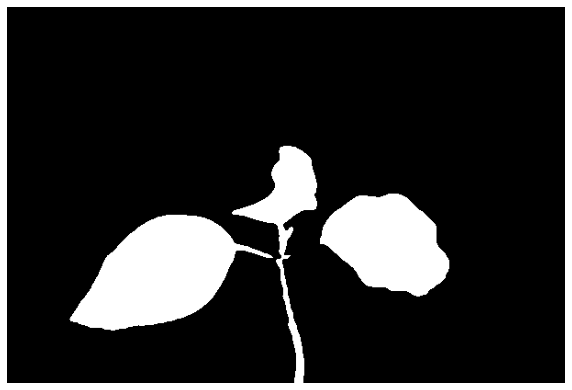

In [18]:
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(thresh,cmap="gray")
plt.show()

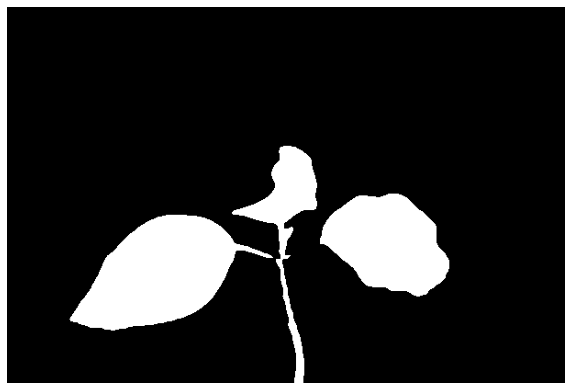

In [19]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(opening,cmap="gray")
plt.show()

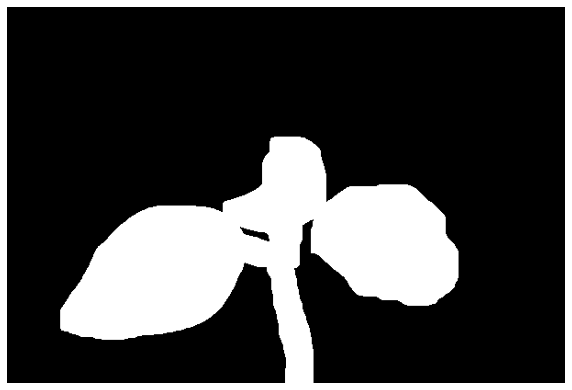

In [20]:
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh,kernel,iterations=10)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_bg,cmap="gray")
plt.show()

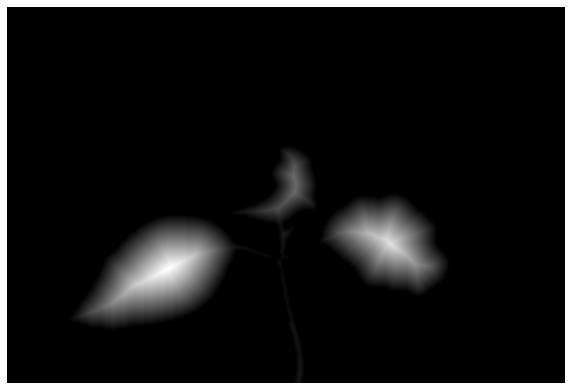

In [21]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(dist_transform,cmap="gray")
plt.show()

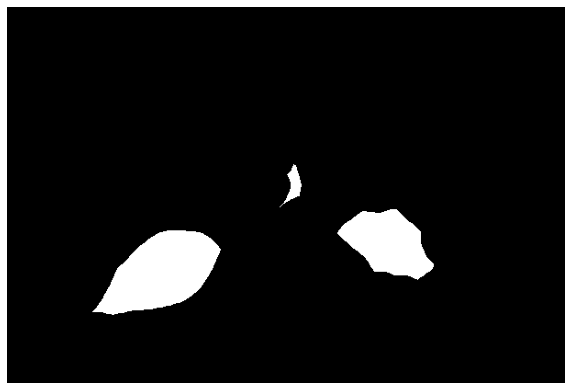

In [30]:
#ret2, sure_fg = cv2.threshold(np.array(dist_transform,dtype = np.uint8),0.5*dist_transform.max(),255,0) #instant t
ret2, sure_fg = cv2.threshold(np.array(dist_transform,dtype = np.uint8),0.3*dist_transform.max(),255,0) # instant t+1

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sure_fg,cmap="gray")
plt.show()

In [27]:
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

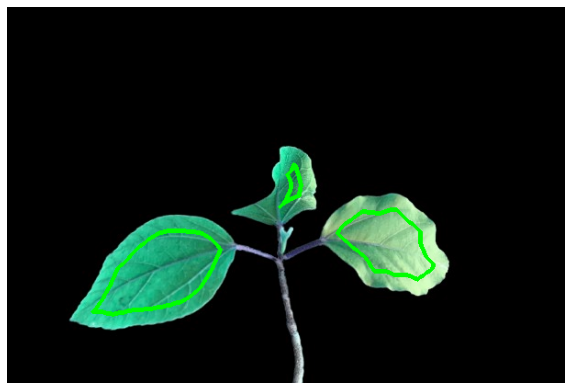

In [28]:
img_cp = img.copy()
cv.drawContours(img_cp, contours, -1, (0,255,0), 3)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_cp,cmap="gray")
plt.show()

In [29]:
print("Le nombre de feuilles : {} feuilles".format(len(contours)))

Le nombre de feuilles : 3 feuilles
